Neste notebook, exploraremos os algoritmos de busca da Inteligência Artificial através de uma emocionante aventura de RPG! Nosso objetivo é guiar o Herói pelo mapa de um reino mágico para resgatar a Princesa da temível Torre da Bruxa. Veremos como diferentes tipos de "aventureiros" (nossos algoritmos) abordam essa missão, desde aqueles que exploram cada canto do mapa (Busca Cega) até os que usam a sabedoria e conhecimento do terreno (Busca Heurística).

Estrutura da Aula (Nível Aventureiro):

O Reino e a Missão:

Apresentação do mapa do reino, seus locais e as distâncias entre eles.

Definição do problema: Ir do Castelo do Herói (ponto de partida) até a Torre da Bruxa (objetivo).

Aventureiros Iniciantes (Busca Cega): Explorando Sem Conhecimento Prévio

Definição: Esses aventureiros não conhecem o caminho e precisam explorar o terreno passo a passo. Eles podem ser metódicos, mas um pouco lentos.

Estratégias:

Explorador da Vizinhança (Busca em Largura - BFS): Sempre explora primeiro todos os locais próximos antes de se aventurar mais longe. Bom para encontrar caminhos com menos paradas.

Explorador Profundo (Busca em Profundidade - DFS): Escolhe um caminho e vai o mais fundo que pode, só voltando se encontrar um beco sem saída. Pode ser rápido se acertar o caminho, mas arriscado.

Aventureiros Experientes (Busca Heurística): Usando Sabedoria e Mapas Mágicos

Definição: Esses aventureiros têm um "mapa mágico" (heurística) que lhes dá uma ideia de quão longe eles estão da Torre da Bruxa, ajudando a guiar suas escolhas.

O Mapa Mágico (Heurística): Uma estimativa da "distância de voo do corvo" até a Torre da Bruxa.

Estratégias:

O Aventureiro Apavorado (Busca Gulosa - Greedy Best-First Search): Sempre segue o caminho que parece levar mais diretamente à Torre da Bruxa, baseado apenas no mapa mágico. Rápido, mas pode não ser o mais seguro ou eficiente.

O Estrategista Mestre (Busca A* - A-Estrela): Combina o conhecimento do caminho já percorrido (o "tempo de viagem" até agora) com o mapa mágico. Encontra o caminho mais rápido e seguro!

# Notebook em Python: A Grande Missão de Resgate!
1. O Reino de Fantasia e a Missão

Vamos criar nosso mapa mágico. Cada local (nó) será uma cidade, floresta, montanha, etc., e as estradas (arestas) terão um "custo" que pode ser o tempo de viagem, perigo, etc. Para simplificar, usaremos o tempo de viagem.

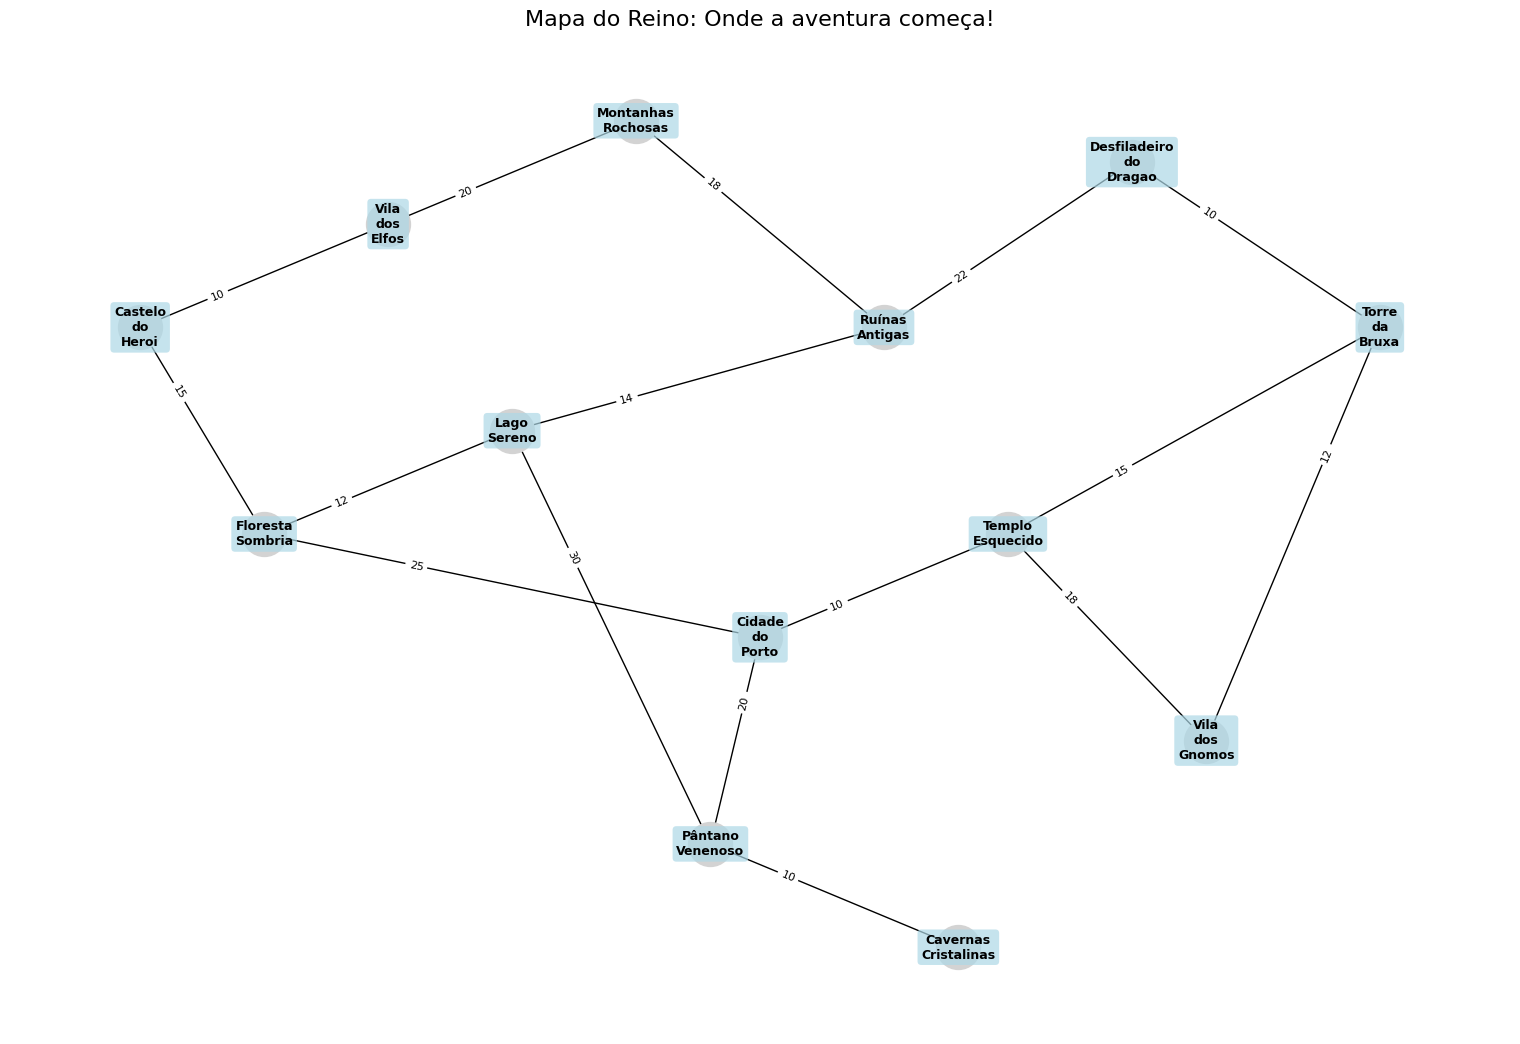

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

# Criando o grafo do nosso reino de fantasia
G_game = nx.Graph()

# Locais no mapa (Cidades, Vilas, Florestas, Montanhas, etc.) e suas posições para visualização
locais = {
    'Castelo do Heroi': (50, 400), 'Vila dos Elfos': (150, 450), 'Floresta Sombria': (100, 300),
    'Montanhas Rochosas': (250, 500), 'Lago Sereno': (200, 350), 'Cidade do Porto': (300, 250),
    'Ruínas Antigas': (350, 400), 'Pântano Venenoso': (280, 150), 'Templo Esquecido': (400, 300),
    'Desfiladeiro do Dragao': (450, 480), 'Torre da Bruxa': (550, 400), 'Vila dos Gnomos': (480, 200),
    'Cavernas Cristalinas': (380, 100)
}

# Conexões e "tempo de viagem" (custo) entre os locais
G_game.add_edge('Castelo do Heroi', 'Vila dos Elfos', weight=10)
G_game.add_edge('Castelo do Heroi', 'Floresta Sombria', weight=15)
G_game.add_edge('Vila dos Elfos', 'Montanhas Rochosas', weight=20)
G_game.add_edge('Floresta Sombria', 'Lago Sereno', weight=12)
G_game.add_edge('Floresta Sombria', 'Cidade do Porto', weight=25)
G_game.add_edge('Montanhas Rochosas', 'Ruínas Antigas', weight=18)
G_game.add_edge('Lago Sereno', 'Ruínas Antigas', weight=14)
G_game.add_edge('Lago Sereno', 'Pântano Venenoso', weight=30)
G_game.add_edge('Cidade do Porto', 'Templo Esquecido', weight=10)
G_game.add_edge('Cidade do Porto', 'Pântano Venenoso', weight=20)
G_game.add_edge('Ruínas Antigas', 'Desfiladeiro do Dragao', weight=22)
G_game.add_edge('Templo Esquecido', 'Torre da Bruxa', weight=15)
G_game.add_edge('Templo Esquecido', 'Vila dos Gnomos', weight=18)
G_game.add_edge('Pântano Venenoso', 'Cavernas Cristalinas', weight=10)
G_game.add_edge('Vila dos Gnomos', 'Torre da Bruxa', weight=12)
G_game.add_edge('Desfiladeiro do Dragao', 'Torre da Bruxa', weight=10)


# Adicionando as posições para visualização
for local, pos in locais.items():
    G_game.nodes[local]['pos'] = pos

# Função para visualizar o grafo e o caminho
def plotar_mapa_aventura(grafo, caminho_encontrado, titulo="Mapa do Reino - A Missão"):
    pos = nx.get_node_attributes(grafo, 'pos')
    pesos = nx.get_edge_attributes(grafo, 'weight')

    plt.figure(figsize=(15, 10))

    # Desenha o grafo base
    nx.draw(grafo, pos, with_labels=True, node_size=1000, node_color='lightgray', font_size=9, font_weight='bold',
            labels={node: node.replace(' ', '\n') for node in grafo.nodes()},
            bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', boxstyle="round,pad=0.3"))
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=pesos, font_size=8, label_pos=0.3)

    # Destaca o caminho encontrado
    if caminho_encontrado:
        caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))
        nx.draw_networkx_nodes(grafo, pos, nodelist=caminho_encontrado, node_color='red', node_size=1200)
        nx.draw_networkx_edges(grafo, pos, edgelist=caminho_arestas, edge_color='red', width=3)

        # Destaca o início e o fim
        nx.draw_networkx_nodes(grafo, pos, nodelist=[caminho_encontrado[0]], node_color='green', node_size=1500, label='Início')
        nx.draw_networkx_nodes(grafo, pos, nodelist=[caminho_encontrado[-1]], node_color='purple', node_size=1500, label='Objetivo')

        # Adiciona um "Herói" no ponto inicial
        plt.text(pos[caminho_encontrado[0]][0], pos[caminho_encontrado[0]][1] + 30, "HERÓI",
                 color='darkgreen', fontsize=12, ha='center', va='bottom', weight='bold')
        plt.text(pos[caminho_encontrado[-1]][0], pos[caminho_encontrado[-1]][1] + 30, "Princesa!",
                 color='darkmagenta', fontsize=12, ha='center', va='bottom', weight='bold')

    plt.title(titulo, fontsize=16)
    plt.axis('off') # Remove os eixos
    plt.show()

# Visualizando o mapa inicial do reino
plotar_mapa_aventura(G_game, [], titulo="Mapa do Reino: Onde a aventura começa!")

2. Aventureiros Iniciantes: Explorando sem um Mapa Mágico (Busca Cega)

Imagine um Herói que não tem nenhum conhecimento prévio do reino. Ele precisa confiar apenas na sua capacidade de explorar.

2.1. O Explorador da Vizinhança (Busca em Largura - BFS)

Este Herói é muito metódico. Antes de ir muito longe, ele explora todos os locais imediatamente acessíveis. Ele garante que não vai perder nenhum atalho!

**A Missão do Explorador da Vizinhança (BFS):**
Caminho encontrado: Castelo do Heroi -> Floresta Sombria -> Cidade do Porto -> Templo Esquecido -> Torre da Bruxa
Custo total da jornada: 65 unidades de tempo


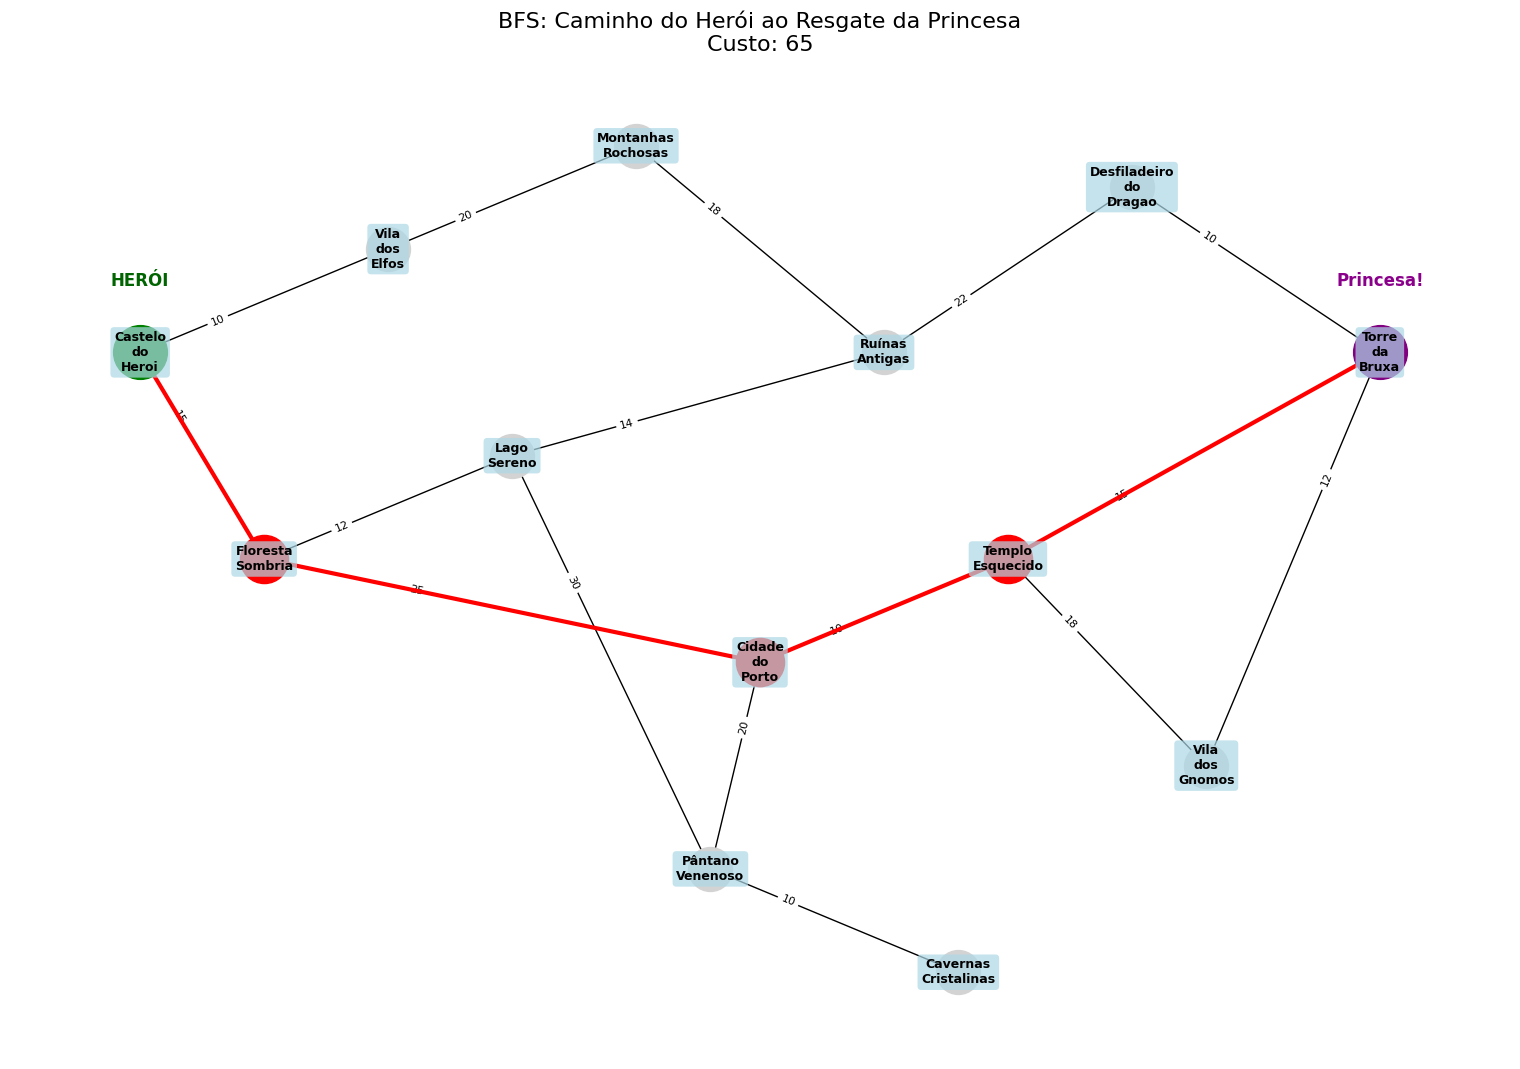

In [2]:
def bfs_game(grafo, inicio, objetivo):
    """
    BFS para o cenário do jogo. Retorna o caminho e o custo total.
    """
    visitados = set()
    fila = deque([(inicio, [inicio], 0)]) # (no_atual, caminho, custo_total)

    if inicio == objetivo:
        return [inicio], 0

    while fila:
        no_atual, caminho, custo_total = fila.popleft()

        if no_atual == objetivo:
            return caminho, custo_total

        if no_atual not in visitados:
            visitados.add(no_atual)
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    fila.append((vizinho, novo_caminho, novo_custo))

    return None, 0 # Caminho não encontrado

# Executando a missão com o Explorador da Vizinhança
heroi_inicio = 'Castelo do Heroi'
princesa_objetivo = 'Torre da Bruxa'
caminho_bfs_game, custo_bfs_game = bfs_game(G_game, heroi_inicio, princesa_objetivo)

print(f"**A Missão do Explorador da Vizinhança (BFS):**")
if caminho_bfs_game:
    print(f"Caminho encontrado: {' -> '.join(caminho_bfs_game)}")
    print(f"Custo total da jornada: {custo_bfs_game} unidades de tempo")
    plotar_mapa_aventura(G_game, caminho_bfs_game,
                          titulo=f"BFS: Caminho do Herói ao Resgate da Princesa\nCusto: {custo_bfs_game}")
else:
    print("O Explorador da Vizinhança não conseguiu encontrar um caminho.")

2.2. O Explorador Profundo (Busca em Profundidade - DFS)

Este Herói é mais impulsivo. Ele escolhe um caminho e segue por ele até o fim, sem olhar para os lados, só voltando se precisar. Pode ser rápido se der sorte, mas também pode se perder em becos sem saída!


**A Missão do Explorador Profundo (DFS):**
Caminho encontrado: Castelo do Heroi -> Floresta Sombria -> Cidade do Porto -> Pântano Venenoso -> Lago Sereno -> Ruínas Antigas -> Desfiladeiro do Dragao -> Torre da Bruxa
Custo total da jornada: 136 unidades de tempo


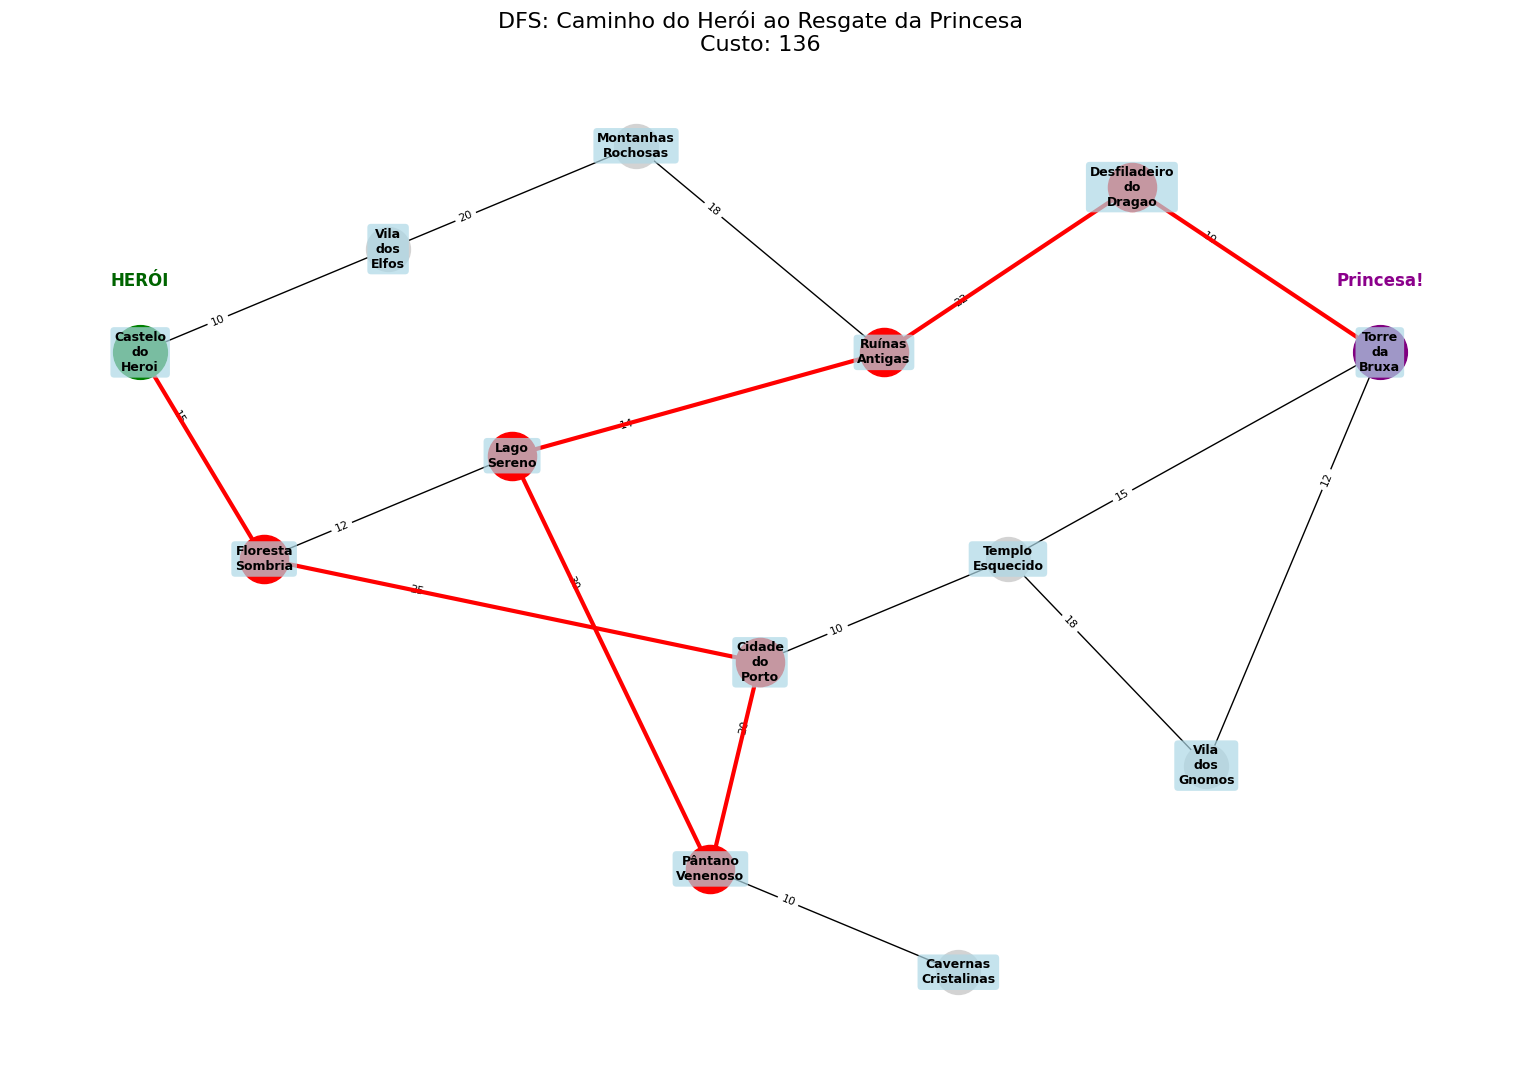

In [3]:
def dfs_game(grafo, inicio, objetivo):
    """
    DFS para o cenário do jogo. Retorna o primeiro caminho encontrado e seu custo.
    """
    pilha = [(inicio, [inicio], 0)] # (no_atual, caminho, custo_total)
    visitados = set()

    while pilha:
        no_actual, caminho, custo_total = pilha.pop() # LIFO - Pilha

        if no_actual == objetivo:
            return caminho, custo_total

        if no_actual not in visitados:
            visitados.add(no_actual)
            for vizinho in grafo[no_actual]:
                if vizinho not in visitados:
                    novo_custo = custo_total + grafo[no_actual][vizinho]['weight']
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    pilha.append((vizinho, novo_caminho, novo_custo))

    return None, 0

# Executando a missão com o Explorador Profundo
caminho_dfs_game, custo_dfs_game = dfs_game(G_game, heroi_inicio, princesa_objetivo)

print(f"\n**A Missão do Explorador Profundo (DFS):**")
if caminho_dfs_game:
    print(f"Caminho encontrado: {' -> '.join(caminho_dfs_game)}")
    print(f"Custo total da jornada: {custo_dfs_game} unidades de tempo")
    plotar_mapa_aventura(G_game, caminho_dfs_game,
                          titulo=f"DFS: Caminho do Herói ao Resgate da Princesa\nCusto: {custo_dfs_game}")
else:
    print("O Explorador Profundo não conseguiu encontrar um caminho.")

3. Aventureiros Experientes: Usando o Mapa Mágico (Busca Heurística)

Agora, nosso Herói tem um item valioso: um Mapa Mágico que mostra a "distância em linha reta" até a Torre da Bruxa. Isso não é o custo real, mas uma estimativa que pode guiar suas escolhas!

In [4]:
# Nosso "Mapa Mágico" (Heurística): Distância imaginária até a Torre da Bruxa
# (Valores simulados, mas poderiam ser calculados a partir das coordenadas)
heuristica_game = {
    'Castelo do Heroi': 250, 'Vila dos Elfos': 200, 'Floresta Sombria': 280,
    'Montanhas Rochosas': 180, 'Lago Sereno': 150, 'Cidade do Porto': 100,
    'Ruínas Antigas': 80, 'Pântano Venenoso': 120, 'Templo Esquecido': 30,
    'Desfiladeiro do Dragao': 50, 'Torre da Bruxa': 0, 'Vila dos Gnomos': 40,
    'Cavernas Cristalinas': 180
}

3.1. O Aventureiro Apavorado (Busca Gulosa - Greedy Best-First Search)

Este Herói está ansioso para salvar a Princesa! Ele sempre escolhe o próximo local que o Mapa Mágico indica como mais próximo da Torre da Bruxa, sem se importar com o tempo que já gastou. Rápido, mas talvez não otimizado!


**A Missão do Aventureiro Apavorado (Busca Gulosa):**
Caminho encontrado: Castelo do Heroi -> Vila dos Elfos -> Montanhas Rochosas -> Ruínas Antigas -> Desfiladeiro do Dragao -> Torre da Bruxa
Custo total da jornada: 80 unidades de tempo


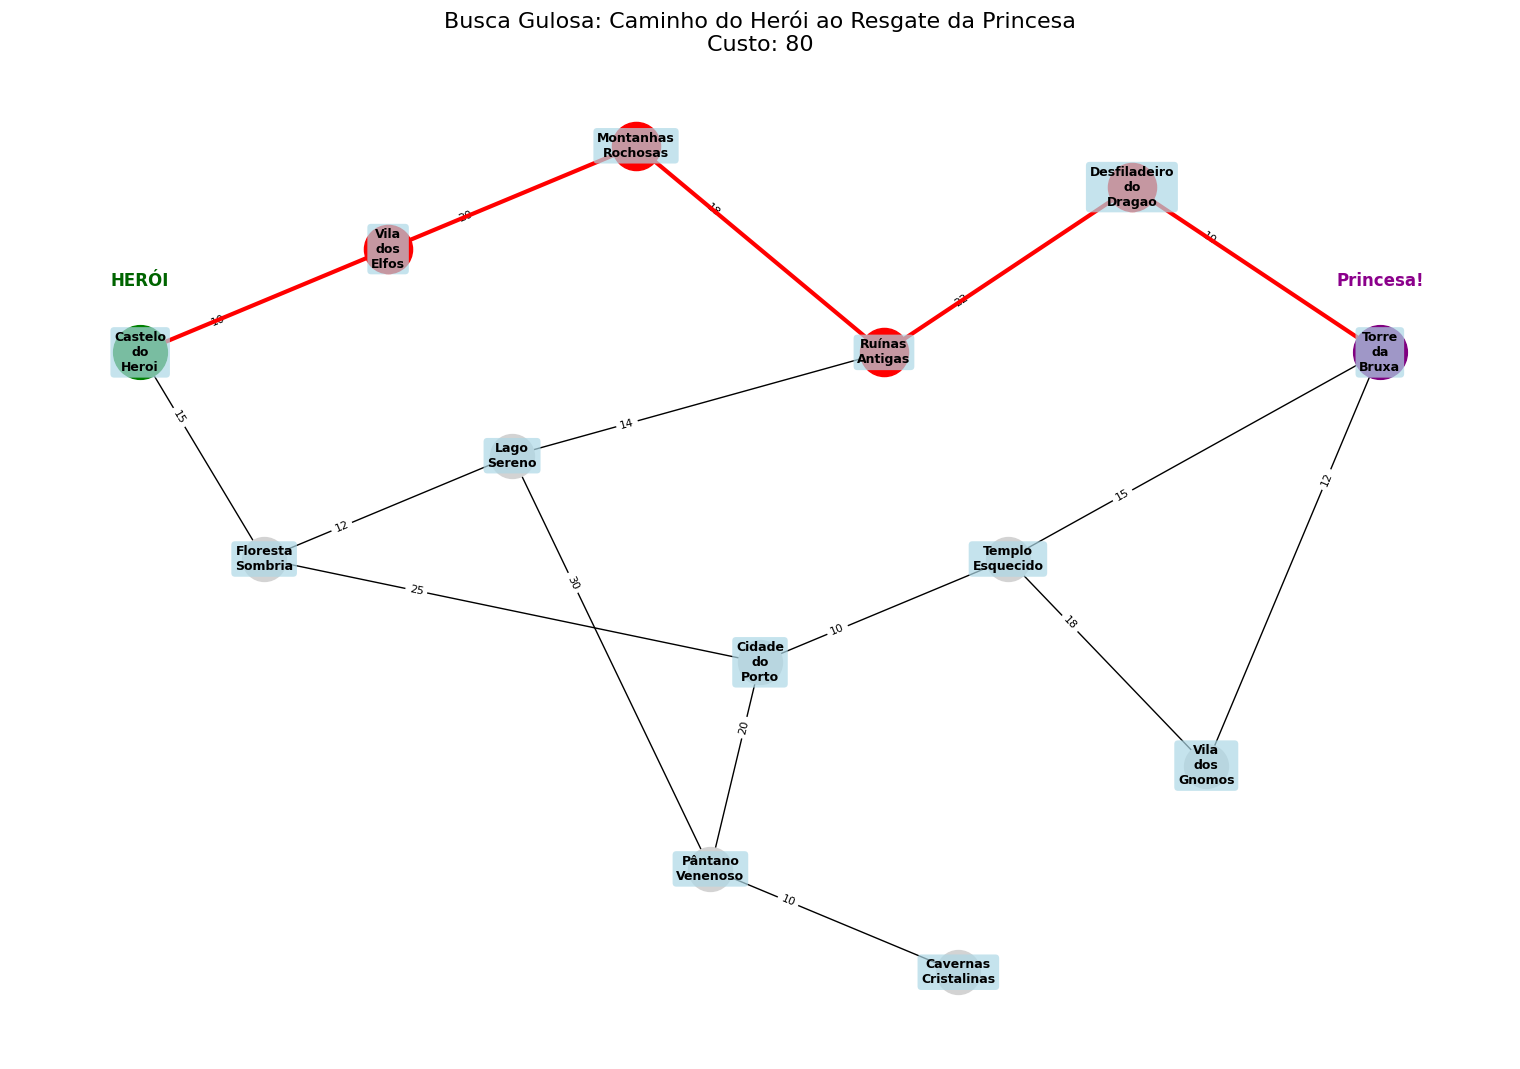

In [5]:
def busca_gulosa_game(grafo, inicio, objetivo, heuristica):
    """
    Busca Gulosa para o cenário do jogo.
    """
    fronteira = [(heuristica[inicio], [inicio], 0)] # (heuristica, caminho, custo_total)
    visitados = set()

    while fronteira:
        _, caminho, custo_total = heapq.heappop(fronteira) # Prioridade pela heurística
        no_atual = caminho[-1]

        if no_atual == objetivo:
            return caminho, custo_total

        if no_atual not in visitados:
            visitados.add(no_atual)
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                    novo_caminho = caminho + [vizinho]
                    heapq.heappush(fronteira, (heuristica[vizinho], novo_caminho, novo_custo))

    return None, 0

# Executando a missão com o Aventureiro Apavorado
caminho_guloso_game, custo_guloso_game = busca_gulosa_game(G_game, heroi_inicio, princesa_objetivo, heuristica_game)

print(f"\n**A Missão do Aventureiro Apavorado (Busca Gulosa):**")
if caminho_guloso_game:
    print(f"Caminho encontrado: {' -> '.join(caminho_guloso_game)}")
    print(f"Custo total da jornada: {custo_guloso_game} unidades de tempo")
    plotar_mapa_aventura(G_game, caminho_guloso_game,
                          titulo=f"Busca Gulosa: Caminho do Herói ao Resgate da Princesa\nCusto: {custo_guloso_game}")
else:
    print("O Aventureiro Apavorado não conseguiu encontrar um caminho.")

3.2. O Estrategista Mestre (Busca A* - A-Estrela)

Este é o Herói mais inteligente! Ele usa o Mapa Mágico, mas também leva em conta o tempo que já gastou para chegar ao local atual. Ele sempre escolhe o caminho que minimiza a "estimativa total": tempo já gasto + tempo estimado para chegar ao objetivo. É o melhor para encontrar o caminho mais rápido e eficiente!


**A Missão do Estrategista Mestre (Busca A*):**
Caminho encontrado: Castelo do Heroi -> Vila dos Elfos -> Montanhas Rochosas -> Ruínas Antigas -> Desfiladeiro do Dragao -> Torre da Bruxa
Custo total da jornada: 80 unidades de tempo


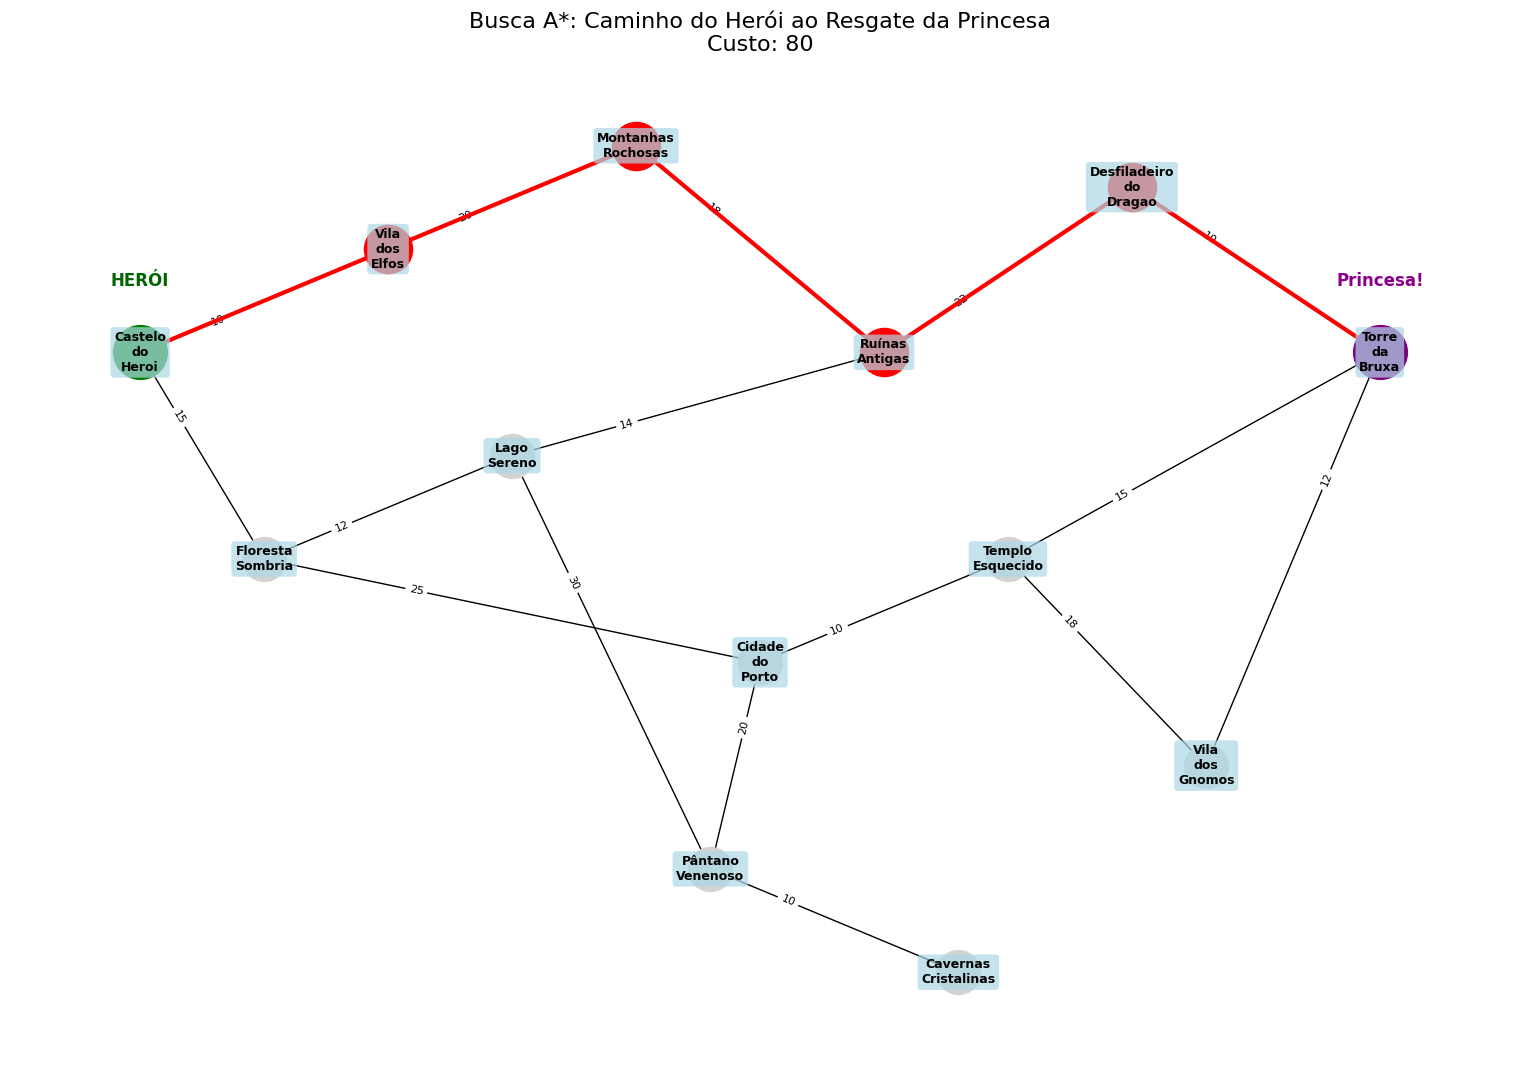

In [6]:
def a_estrela_game(grafo, inicio, objetivo, heuristica):
    """
    Busca A* para o cenário do jogo.
    """
    # (f_n, g_n, caminho)
    fronteira = [(heuristica[inicio], 0, [inicio])]
    # Para evitar reprocessar nós com custo maior, guardamos o menor g_n encontrado
    custos_passados = {inicio: 0}

    while fronteira:
        f_n, g_n, caminho = heapq.heappop(fronteira)
        no_atual = caminho[-1]

        if no_atual == objetivo:
            return caminho, g_n

        # Se já encontramos um caminho melhor para este nó, ignoramos este
        if g_n > custos_passados.get(no_atual, float('inf')):
            continue

        for vizinho in grafo[no_atual]:
            custo_aresta = grafo[no_atual][vizinho]['weight']
            novo_g_n = g_n + custo_aresta

            # Se este novo caminho para o vizinho é melhor
            if novo_g_n < custos_passados.get(vizinho, float('inf')):
                custos_passados[vizinho] = novo_g_n
                novo_f_n = novo_g_n + heuristica[vizinho]
                novo_caminho = caminho + [vizinho]
                heapq.heappush(fronteira, (novo_f_n, novo_g_n, novo_caminho))

    return None, 0

# Executando a missão com o Estrategista Mestre
caminho_a_estrela_game, custo_a_estrela_game = a_estrela_game(G_game, heroi_inicio, princesa_objetivo, heuristica_game)

print(f"\n**A Missão do Estrategista Mestre (Busca A*):**")
if caminho_a_estrela_game:
    print(f"Caminho encontrado: {' -> '.join(caminho_a_estrela_game)}")
    print(f"Custo total da jornada: {custo_a_estrela_game} unidades de tempo")
    plotar_mapa_aventura(G_game, caminho_a_estrela_game,
                          titulo=f"Busca A*: Caminho do Herói ao Resgate da Princesa\nCusto: {custo_a_estrela_game}")
else:
    print("O Estrategista Mestre não conseguiu encontrar um caminho.")

Discussão:

Qual Herói encontrou o caminho com o menor custo total (menor tempo de viagem)?

O que você notou sobre os caminhos da BFS e da DFS? Eles são sempre os mais curtos?

A Busca Gulosa foi mais rápida para encontrar um caminho do que a DFS, mas será que foi o melhor caminho? Por quê?

Por que o Estrategista Mestre (A*) geralmente encontra a melhor solução (o caminho mais curto) quando a heurística é boa?